# Tries = retrieval tree = prefix tree  
- these are a kind of trees and used in String related questions
- it is a k array tree it means at max k trees possible means from 0 to k 
- due to these it may be bulky 
- it occupy more space due to its bulkiness
- but it give good timecomplexity so we use it to inchance the time 
- many nodes can be at same level means one root and many nodes


###  create trie
- we createa  node root
- and now we do like this in picture 
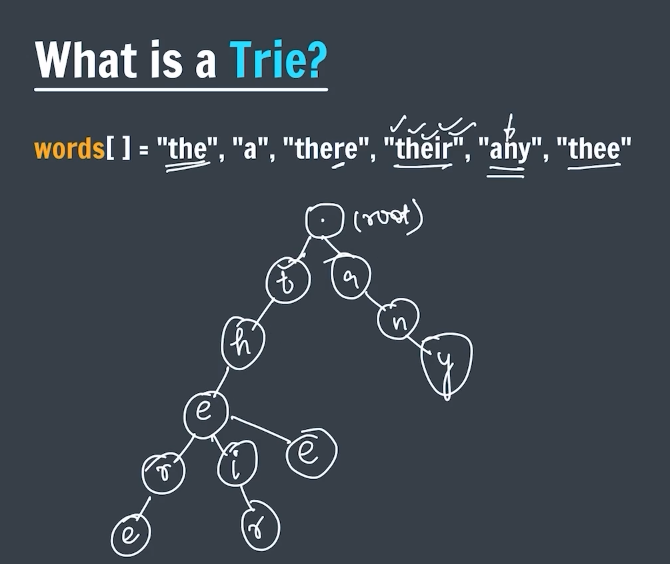  
- in this trie prefix is stored only one time and due to this timecomplexity is reduced 


### Question 1268 : Search Suggestions System

You are given an array of strings products and a string searchWord.

Design a system that suggests at most three product names from products after each character of searchWord is typed. Suggested products should have common prefix with searchWord. If there are more than three products with a common prefix return the three lexicographically minimums products.

Return a list of lists of the suggested products after each character of searchWord is typed.


Example 1:


Input: products = ["mobile","mouse","moneypot","monitor","mousepad"], searchWord = "mouse"


Output: [["mobile","moneypot","monitor"],["mobile","moneypot","monitor"],["mouse","mousepad"],["mouse","mousepad"],["mouse","mousepad"]]


Explanation: products sorted lexicographically = ["mobile","moneypot","monitor","mouse","mousepad"].
After typing m and mo all products match and we show user ["mobile","moneypot","monitor"].
After typing mou, mous and mouse the system suggests ["mouse","mousepad"].


Example 2:

Input: products = ["havana"], searchWord = "havana"


Output: [["havana"],["havana"],["havana"],["havana"],["havana"],["havana"]]


Explanation: The only word "havana" will be always suggested while typing the search word.
 

### Algorithm:

To allow the auto-completion/word-suggestion feature, create your typical Trie node class with an extra attribute:


In [ ]:
class Node:
    def __init__(self, val):
        self.val = val
        self.children = {}
        self.suggestions = []

While building the trie, we insert a new character node in the trie and at the same time we also append the word from which the character was taken (the word we are trying to insert) into suggestions as seen below


In [ ]:
def insert(self, word):
        root = self.root
        for char in word:
            if char not in root.children:
                root.children[char] = Node(char)  # -- add node
            
            if len(root.suggestions) < 3:
                root.suggestions.append(word)  # ------ add suggestions 

We also take care of some requirements such as:

- limiting the suggestions to the 3 smallest suggestions -lexicographically speaking
- The sorting part is taken care of in the main function as we sort the products even before we start inserting them into trie.
\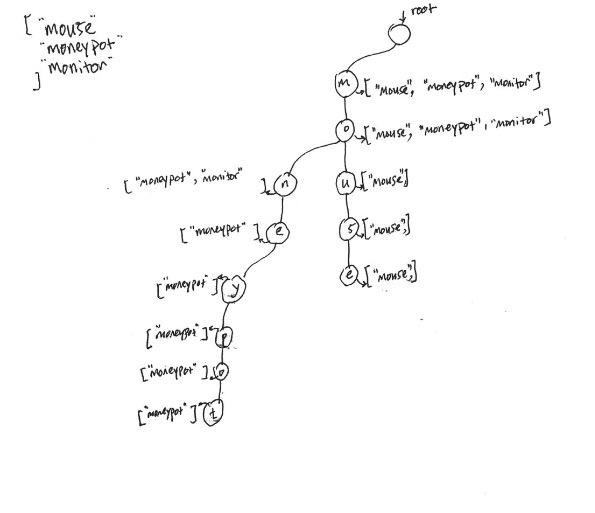


In [ ]:
class Node:
    def __init__(self, val):
        self.val = val
        self.children = {}
        self.suggestions = []
        
class Trie:
    def __init__(self):
        self.root = Node(None)
        
    def insert(self, word):
        root = self.root
        for char in word:
            if char not in root.children:
                root.children[char] = Node(char)  # -- add node
            
            if len(root.suggestions) < 3:
                root.suggestions.append(word)  # ------ add suggestions 
            
            # move further down
            root = root.children[char] 
            
        # don't forget last node
        if len(root.suggestions) < 3:
            root.suggestions.append(word)
            
    def find(self, word):
        root = self.root
        res = [] # - collect the suggestions
        for i, char in enumerate(word):
            if char in root.children:
                root = root.children[char] # - locate char node
                res.append(root.suggestions) # - append its suggestions
            else:
                break # -------------- II
        remaining = len(word) - len(res)
        for j in range(remaining):
            res.append([])
                
        return res
        
        
class Solution:
    def suggestedProducts(self, products: List[str], searchWord: str) -> List[List[str]]:

        # edge cases:
        if len(products) == 1 and products[0] == searchWord:
            return [[searchWord] for i in range(len(searchWord))]
        
        products.sort() #
        trie = Trie()
        for product in products:
            trie.insert(product)
        return trie.find(searchWord)
    
    
    # Comment - II
	# We want to make sure we add an empty list for every character that does not exist down the path we are traversing in the trie
    # Once you encounter a char that is not in the same trie path. In other words, 
    # as soon as the word devaite from the product, you terminate the loop and 
    # append m empty lists where m is the number of chars remaning in the product name
	#  example:
	# ["moan"], "mouse"
    # [["moan"],["moan"],[],[],[]]